In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For all three methods, we'll be using the same simulated dataset, with three "blobs." We won't need to normalize the data since it is simulated and comes pre-normalized, but with real data normalization will be important to make sure all your features are given equal weight in finding a clustering solution.

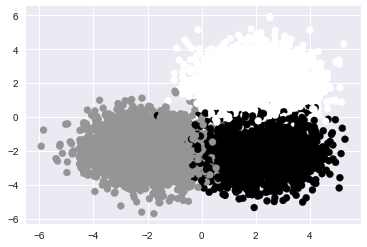

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

# Let's look at some mean shift code.

In [3]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters = len(np.unique(labels))

print('Number of Estimated Clusters: {}'.format(n_clusters))

Number of Estimated Clusters: 3


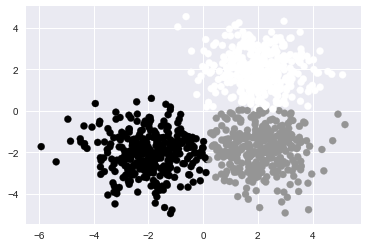

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [4]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, labels))

# Spectral Clustering

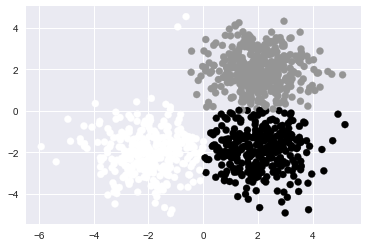

Comparing the assigned categories to teh ones in the data: 
col_0    0    1    2
row_0               
0        2  350   10
1      310    1    9
2        6    7  305


In [5]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters = 3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict = sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to teh ones in the data: ')
print(pd.crosstab(y_train, predict))

# Affinity Propagation

In [7]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
ap = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = ap.cluster_centers_indices_
n_clusters = len(cluster_centers_indices)
labels = ap.labels_

print('Estimated Number of Clusters: {}'.format(n_clusters))

Done
Estimated Number of Clusters: 32


In [8]:
# Affinity propagation is known to overestimate the number of clusters – 
# in this case, we have an absolutely absurd number. Let's see what that looks like:

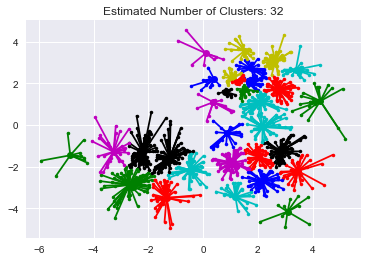

In [11]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
            cluster_center[1],
            'o',
            markerfacecolor = col,
            markeredgecolor = 'k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
        
plt.title('Estimated Number of Clusters: {}'.format(n_clusters))
plt.show()

# Now go back and change the data. Set up at least three different blob configuations, then run the four methods ( k-means, mean shift, spectral clustering and affinity propagation) on each one.

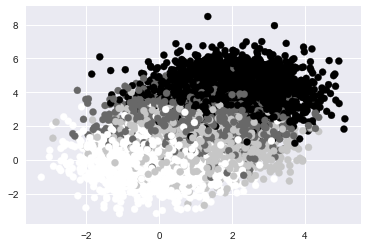

In [12]:
# First configuration

# The coordinates of the centers of our blobs.
centers1 = [[0, 0], [1, 1], [1, 2], [2, 4]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers1,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

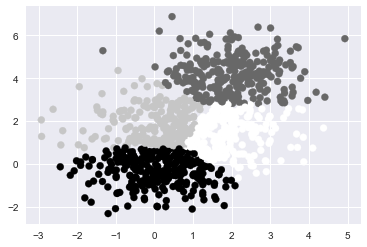

In [17]:
# K-means

from sklearn.cluster import KMeans

# Calculate the predicted values
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_train)

# Plot the solution
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

Number of Estimated Clusters: 1


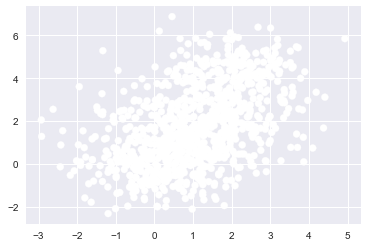

Comparing the assigned categories to the ones in the data:
col_0    0
row_0     
0      273
1      239
2      238
3      250


In [18]:
# Mean Shift

bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters = len(np.unique(labels))

print('Number of Estimated Clusters: {}'.format(n_clusters))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, labels))

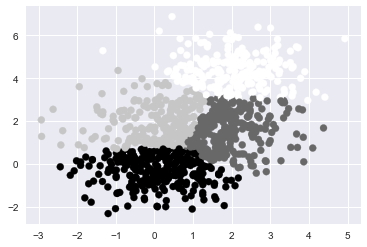

Comparing the assigned categories to teh ones in the data: 
col_0    0    1    2    3
row_0                    
0        0   51   19  203
1        5   64  101   69
2       17  102  109   10
3      201   18   31    0


In [19]:
# Spectral clustering

# We know we're looking for three clusters.
n_clusters = 4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict = sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to teh ones in the data: ')
print(pd.crosstab(y_train, predict))

Done
Estimated Number of Clusters: 62


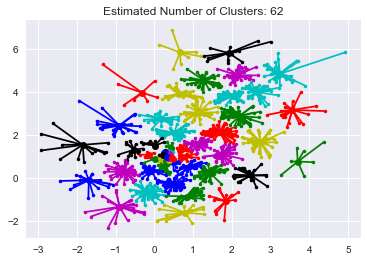

In [21]:
# Affinity propagation

ap = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = ap.cluster_centers_indices_
n_clusters = len(cluster_centers_indices)
labels = ap.labels_

print('Estimated Number of Clusters: {}'.format(n_clusters))

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
            cluster_center[1],
            'o',
            markerfacecolor = col,
            markeredgecolor = 'k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
        
plt.title('Estimated Number of Clusters: {}'.format(n_clusters))
plt.show()

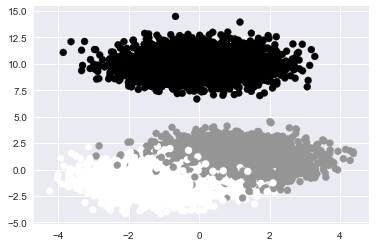

In [24]:
# Second configuration

# The coordinates of the centers of our blobs.
centers2 = [[-1, -1], [1, 1], [0, 10]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers2,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

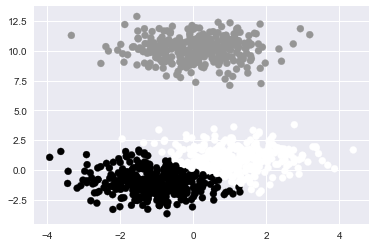

In [26]:
# K-means

# Calculate the predicted values
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_train)

# Plot the solution
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

Number of Estimated Clusters: 2


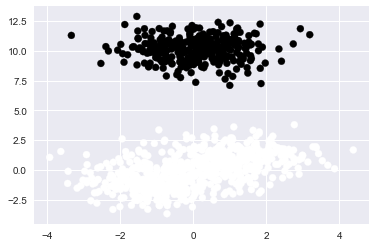

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      362    0
1      320    0
2        0  318


In [27]:
# Mean Shift

bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters = len(np.unique(labels))

print('Number of Estimated Clusters: {}'.format(n_clusters))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, labels))

Done
Estimated Number of Clusters: 25


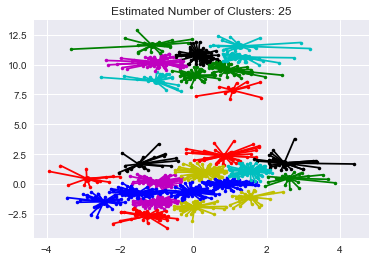

In [28]:
# Affinity propagation

ap = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = ap.cluster_centers_indices_
n_clusters = len(cluster_centers_indices)
labels = ap.labels_

print('Estimated Number of Clusters: {}'.format(n_clusters))

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
            cluster_center[1],
            'o',
            markerfacecolor = col,
            markeredgecolor = 'k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
        
plt.title('Estimated Number of Clusters: {}'.format(n_clusters))
plt.show()

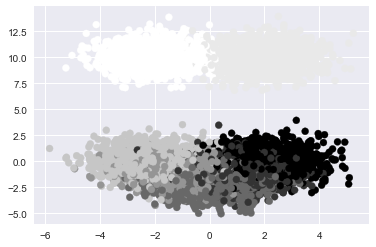

In [29]:
# Third configuration

# The coordinates of the centers of our blobs.
centers3 = [[-2, 10], [2, 10], [-2, 0], [-1, -1], [0, -2], [1, -1], [2, 0]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers3,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

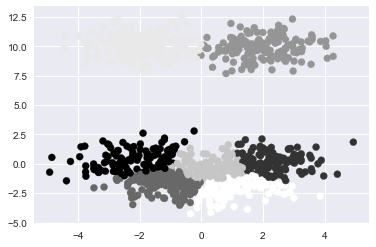

In [30]:
# K-means

# Calculate the predicted values
y_pred = KMeans(n_clusters=7, random_state=42).fit_predict(X_train)

# Plot the solution
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

Number of Estimated Clusters: 3


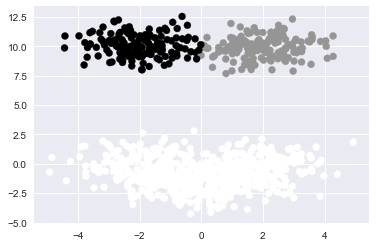

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        0    4  145
1        0  150    5
2      147    0    0
3      135    0    0
4      141    0    0
5      150    0    0
6      123    0    0


In [31]:
# Mean Shift

bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters = len(np.unique(labels))

print('Number of Estimated Clusters: {}'.format(n_clusters))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, labels))

Done
Estimated Number of Clusters: 43


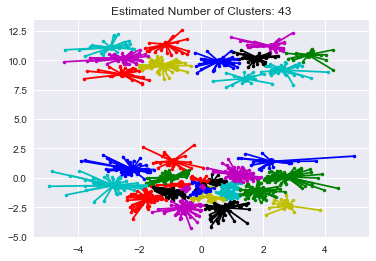

In [32]:
# Affinity propagation

ap = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = ap.cluster_centers_indices_
n_clusters = len(cluster_centers_indices)
labels = ap.labels_

print('Estimated Number of Clusters: {}'.format(n_clusters))

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
            cluster_center[1],
            'o',
            markerfacecolor = col,
            markeredgecolor = 'k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
        
plt.title('Estimated Number of Clusters: {}'.format(n_clusters))
plt.show()